## Practice Case

In [22]:
import pandas as pd

In [11]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# A. The Shape of The Data
df.shape

(1338, 7)

In [13]:
# B. The Data Types of Each Attributes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
# C. Checking The Present of Missing Values
df.isnull().values.any()

False

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# D. 5 Points Summary of Numerical Attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


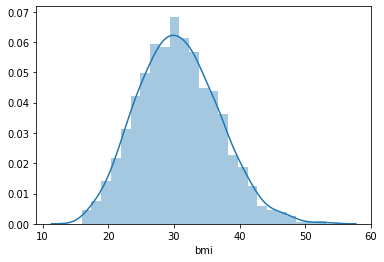

In [73]:
#E. Distribution of 'bmi', 'age', and 'charges' Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rand
import scipy.stats as scs

#For 'bmi' column
sns.distplot(df['bmi'])

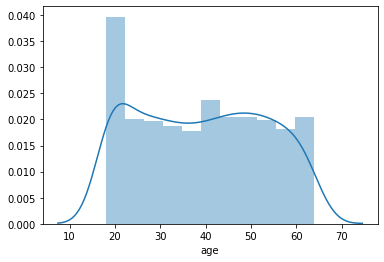

In [74]:
#For 'age' column
sns.distplot(df['age'])

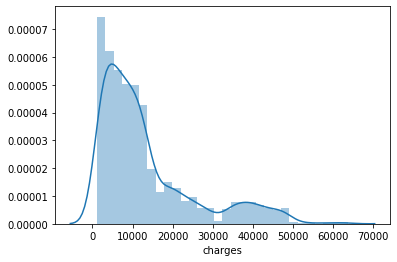

In [75]:
# For 'charges' column
sns.distplot(df['charges'])

In [20]:
# The Measure of Skewness of 'bmi', 'age', and 'charges'
df.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [76]:
# G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1
iqr

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [79]:
((df<(q1 - 1.5*iqr)) |((df>(q1 + 1.5*iqr)))).sum()

age          22
bmi         130
charges     230
children     43
region        0
sex           0
smoker        0
dtype: int64

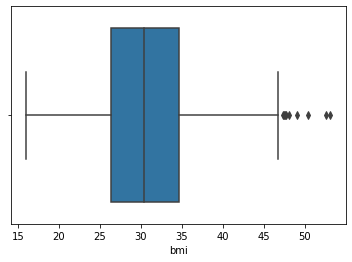

In [80]:
# For 'bmi' column
sns.boxplot(df['bmi'])

In [90]:
q1_bmi = np.percentile(df['bmi'], 25)
q3_bmi = np.percentile(df['bmi'], 75)

iqr_bmi = q3_bmi - q1_bmi
iqr_bmi

8.3975

In [113]:
# Measurement of lower Outlier
lower_outlier = q1 - 1.5*iqr
lower_outlier

age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64

In [114]:
# Measurement of Upper Outlier
upper_outlier = q3 + 1.5*iqr
upper_outlier

age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64

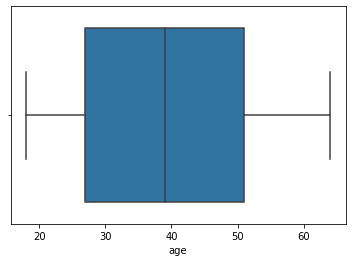

In [81]:
# For 'age' Column
sns.boxplot(df['age'])

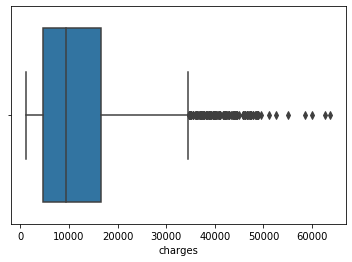

In [84]:
# For 'Charges' Column
sns.boxplot(df['charges'])

## 2. Answer the following questions with statistical evidence

In [ ]:
# A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)


In [135]:
smoker = df[df['smoker'] == 'yes']['charges']

In [136]:
non_smoker = df[df['smoker'] == 'no']['charges']

In [133]:
stat, p = scs.ttest_ind(smoker, non_smoker, equal_var = True)
stat_ttest

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [134]:
# interpret via p-value
if p > 0.05:
    print('Accept null hypothesis.')
else:
    print('Reject the null hypothesis.')

Reject the null hypothesis.
